In [1]:
import pandas as pd
import datetime
import sys
sys.path.append('./utils')
from utils import *
from process import * 
from add_list_master import *
import japanize_matplotlib

In [2]:
# データ保存先
data_folda = '../data/'

target_column="target3"
make_genre_list=True

In [3]:
# 説明変数のリスト
explain_columns=base_info+add_list_master
# explain_columns=base_info+add_list_master+add_list_hitosara+add_list_retty+add_list_tripadvisor+add_list_google+add_list_hotpepper+add_list_google_review
# explain_columns=base_info+add_list_master#+add_list_retty+add_list_google+add_list_hotpepper+add_list_google_review+add_list_station+add_list_close_ratio 0.670
# explain_columns=base_info+add_list_master+add_list_google_review+add_list_station+add_list_close_ratio #0.685
# explain_columns=base_info+add_list_master+add_list_google_review+add_list_station+add_list_close_ratio+add_list_retty+add_list_google # 0.694
# explain_columns=base_info+add_list_master+add_list_google_review+add_list_station+add_list_close_ratio+add_list_retty+add_list_google+add_list_hotpepper # 0.693
# 重複を削除
explain_columns=list(set(explain_columns))

In [4]:
pseudo_time_series_with = extract_features(data_folda,"train_with_all.pkl",explain_columns, target_column,media=["general_rank_GOOGLE","general_rank_RETTY","general_rank_HOTPEPPER"])#,ranks=["S","A","B"])
#non bias dataも読み込む
if(target_column=="target3"):
    pseudo_time_series_with_non_bias = extract_features(data_folda,"test3_with_all_11.pkl",explain_columns, target_column,media=["general_rank_GOOGLE","general_rank_RETTY","general_rank_HOTPEPPER"])#,ranks=["S","A","B"])
elif(target_column=="target6"):
    pseudo_time_series_with_non_bias = extract_features(data_folda,"test6_with_all.pkl",explain_columns, target_column,media=["general_rank_GOOGLE","general_rank_RETTY","general_rank_HOTPEPPER"])#,ranks=["S","A","B"])

In [5]:
pseudo_time_series_with.shape

(5229576, 28)

In [6]:
#close_ratios=pd.read_pickle(data_folda+'close_ratios.pkl')
#pseudo_time_series_with=pd.merge(pseudo_time_series_with,close_ratios,on=["base_date","genre_first_name"],how="left")
#pseudo_time_series_with_non_bias=pd.merge(pseudo_time_series_with_non_bias,close_ratios,on=["base_date","genre_first_name"],how="left")

In [7]:
if(make_genre_list==True):
    # genreのリストを作成
    genre0=pseudo_time_series_with["genre_first_name"].unique()
    genre1=pseudo_time_series_with["genre_second_name"].unique()
    genre2=pseudo_time_series_with["genre_third_name"].unique()
    
    genre_list = list(set(list(genre0)+list(genre1)+list(genre2)))
    #毎回読み込むのは時間がかかるので、一度読み込んだらpickleで保存しておく
    genre_list = pd.Series(genre_list)
    genre_list.dropna().to_pickle(data_folda+'genre_list.pkl')
    genre_list = pd.read_pickle(data_folda+'genre_list.pkl').dropna().to_list()
else:
    # 保存しておいたgenre_listを、listとして読み込む
    genre_list = pd.read_pickle(data_folda+'genre_list.pkl').dropna().to_list()

In [8]:
if(target_column=="target6"):
    base_month_1="202302"
    pseudo_time_series_with_1 = make_train_data(pseudo_time_series_with, base_month_1, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)

In [9]:
#base_month_1="202301"
#pseudo_time_series_with_1 = make_train_data(pseudo_time_series_with, base_month_1, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)

In [10]:
if(target_column=="target3"):
    base_month_4="202304"
    pseudo_time_series_with_4 = make_train_data(pseudo_time_series_with, base_month_4, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)
    """
    base_month_5="202305"
    pseudo_time_series_with_5 = make_train_data(pseudo_time_series_with, base_month_5, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)
    base_month_6="202306"
    pseudo_time_series_with_6 = make_train_data(pseudo_time_series_with, base_month_6, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)    
    """
    base_month_7="202307"
    pseudo_time_series_with_7 = make_train_data(pseudo_time_series_with, base_month_7, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)

In [11]:
# augumented_data_train_1とaugumented_data_train_2を結合
if(target_column=="target3"):
    pseudo_time_series_train=pd.concat([pseudo_time_series_with_4
                                        ,pseudo_time_series_with_7])


if(target_column=="target6"):
    pseudo_time_series_train=pseudo_time_series_with_1
#del pseudo_time_series_with_0, pseudo_time_series_with_4


In [14]:
if(target_column=="target6"):
    base_month_test="202308"
else:
    base_month_test="202310"
pseudo_time_series_with_test = make_train_data(pseudo_time_series_with_non_bias, base_month_test, explain_columns, target_column,  data_folda, genre_list, read_from_pickle=False)

In [17]:
# dtypeが object になっているものを表示
pseudo_time_series_train.select_dtypes(include=object).columns


Index(['genre_second_name', 'genre_first_name', 'genre_third_name',
       'restaurant_id', 'created_at', 'head_branch', 'name'],
      dtype='object')

In [18]:
#pseudo_time_series_train4=fix_structured_data(pseudo_time_series_with_4)
#pseudo_time_series_train5=fix_structured_data(pseudo_time_series_with_5)
#pseudo_time_series_train6=fix_structured_data(pseudo_time_series_with_6)
#pseudo_time_series_train7=fix_structured_data(pseudo_time_series_with_7)

pseudo_time_series_train=fix_structured_data(pseudo_time_series_train)
pseudo_time_series_with_test=fix_structured_data(pseudo_time_series_with_test)

In [19]:
# object型、datetime型の列を削除する関数
def drop_object_columns(df):
    for col in df.columns:
        if df[col].dtypes=="object" or df[col].dtypes=="datetime64[ns]":
            df.drop(col,axis=1,inplace=True)
    return df   

In [20]:
# object型、datetime型の列を削除
pseudo_time_series_train=drop_object_columns(pseudo_time_series_train)
pseudo_time_series_with_test=drop_object_columns(pseudo_time_series_with_test)

In [21]:
# bool型をint型に変換
def bool_to_int(df):
    for col in df.columns:
        if df[col].dtypes=="bool":
            df[col]=df[col].astype(int)
    return df

# category型をdummy型に変換
def category_to_dummy(df):
    for col in df.columns:
        if df[col].dtypes=="category":
            df=pd.get_dummies(df, columns=[col])
    return df

pseudo_time_series_train=bool_to_int(pseudo_time_series_train)
pseudo_time_series_with_test=bool_to_int(pseudo_time_series_with_test)

pseudo_time_series_train=category_to_dummy(pseudo_time_series_train)
pseudo_time_series_with_test=category_to_dummy(pseudo_time_series_with_test)

In [22]:
pseudo_time_series_train.groupby("target3")["sentiment_score"].mean()

KeyError: 'Column not found: sentiment_score'

In [23]:
pseudo_time_series_with_test

,northlatitude,days_from_lastvisit,photo_interior_count,photo_exterior_count,price_range_lunch_owner,photo_food_count,net_reservation_flg,photo_drink_count,close_ratio_genre,all_photo_count,...,prefecture_name_茨城県,prefecture_name_長崎県,prefecture_name_長野県,prefecture_name_青森県,prefecture_name_静岡県,prefecture_name_香川県,prefecture_name_高知県,prefecture_name_鳥取県,prefecture_name_鹿児島県,name_size
0,34.696583,0.0,3,2,NaN,24,0,2,0.004762,31,...,0,0,0,0,1,0,0,0,0,4.0
1,35.091500,NaN,0,0,NaN,0,0,0,0.005113,0,...,0,0,0,0,1,0,0,0,0,1.0
2,34.872462,2221.0,22,6,1.0,27,0,6,0.004748,71,...,0,0,0,0,0,0,0,0,0,1.0
3,33.558800,0.0,2,1,NaN,64,0,2,0.004642,69,...,0,0,0,0,0,0,0,0,0,493.0
4,35.642649,0.0,11,6,0.0,77,1,2,0.005772,96,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422617,35.700250,0.0,7,16,NaN,40,0,0,0.002711,63,...,0,0,0,0,0,0,0,0,0,1.0
422618,35.014264,0.0,8,5,0.0,58,1,3,0.005163,74,...,0,0,0,0,0,0,0,0,0,3.0
422619,33.582342,637.0,4,4,NaN,6,0,1,0.004351,15,...,0,0,0,0,0,0,0,0,0,1.0
422620,26.228904,5112.0,0,0,NaN,0,0,0,0.003918,0,...,0,0,0,0,0,0,0,0,0,17.0


In [24]:
test_train_dist=compare_test_train_dist(data_folda,train=pseudo_time_series_train,test=pseudo_time_series_with_test)

In [25]:
test_train_dist.index.values

array(['northlatitude', 'days_from_lastvisit', 'photo_interior_count',
       'photo_exterior_count', 'price_range_lunch_owner',
       'photo_food_count', 'net_reservation_flg', 'photo_drink_count',
       'close_ratio_genre', 'all_photo_count', 'price_range_dinner_owner',
       'openning_days', 'price_range_lunch_user', 'official_info_flg',
       'eval_period', 'eastlongitude', 'price_range_dinner_user',
       '豚丼_cat_dummy', 'ハワイ料理_cat_dummy', '薬膳_cat_dummy',
       '日本酒バー_cat_dummy', 'バル_cat_dummy', 'スイーツ_cat_dummy',
       '社員食堂_cat_dummy', 'ロシア料理_cat_dummy', 'ペルー料理_cat_dummy',
       '中華菓子_cat_dummy', 'かき_cat_dummy', '日本料理_cat_dummy',
       '海鮮丼_cat_dummy', '立ち食い寿司_cat_dummy', 'スポーツバー_cat_dummy',
       '牛カツ_cat_dummy', 'もつ焼き_cat_dummy', 'ホテル_cat_dummy',
       'ドーナツ_cat_dummy', 'イタリアン_cat_dummy', '中南米料理_cat_dummy',
       'ステーキ_cat_dummy', 'ケーキ_cat_dummy', 'オーガニック_cat_dummy',
       'チーズ料理_cat_dummy', '四川料理_cat_dummy', 'イノベーティブ_cat_dummy',
       'いなり寿司_cat_dummy', 'カステラ_cat

In [26]:
"""
pref_count=pd.DataFrame()
# prefecture 毎の月の店舗数の変化率をカウント
for p in pseudo_time_series_train["prefecture_name"].unique():
    pnum=pseudo_time_series_train[pseudo_time_series_train["prefecture_name"]==p].groupby("base_date")["name"].count()
    pref_count=pd.concat([pseudo_time_series_train,pnum.reset_index],axis=1)
"""

'\npref_count=pd.DataFrame()\n# prefecture 毎の月の店舗数の変化率をカウント\nfor p in pseudo_time_series_train["prefecture_name"].unique():\n    pnum=pseudo_time_series_train[pseudo_time_series_train["prefecture_name"]==p].groupby("base_date")["name"].count()\n    pref_count=pd.concat([pseudo_time_series_train,pnum.reset_index],axis=1)\n'

In [27]:
test_train_dist_filter=test_train_dist[test_train_dist["target1_test_count"]>0].dropna()
test_train_dist_filter=test_train_dist_filter[(test_train_dist_filter["test_ratio_over_train_ratio"]>0.0)
                       &(test_train_dist_filter["test_ratio_over_train_ratio"]<10)]

# 1-test_ratio と 1-train_ratio の掛け算が正のものを抽出
test_train_dist_filter=test_train_dist_filter[(1-test_train_dist_filter["test_ratio"]) * (1-test_train_dist_filter["train_ratio"])>0]


ex=test_train_dist_filter.index
ex.values


array(['northlatitude', 'photo_interior_count', 'photo_exterior_count',
       'photo_food_count', 'net_reservation_flg', 'photo_drink_count',
       'close_ratio_genre', 'all_photo_count', 'price_range_dinner_owner',
       'openning_days', 'price_range_lunch_user', 'official_info_flg',
       'eastlongitude', 'price_range_dinner_user', '豚丼_cat_dummy',
       'ハワイ料理_cat_dummy', '日本酒バー_cat_dummy', 'バル_cat_dummy',
       'スイーツ_cat_dummy', '日本料理_cat_dummy', '海鮮丼_cat_dummy',
       'もつ焼き_cat_dummy', 'イタリアン_cat_dummy', 'ステーキ_cat_dummy',
       'オーガニック_cat_dummy', 'インドカレー_cat_dummy', '焼肉_cat_dummy',
       'ラーメン_cat_dummy', 'ジビエ料理_cat_dummy', '油そば・まぜそば_cat_dummy',
       'スープカレー_cat_dummy', 'パスタ_cat_dummy', '肉料理_cat_dummy',
       'お好み焼き_cat_dummy', 'パンケーキ_cat_dummy', 'ハンバーガー_cat_dummy',
       '創作料理_cat_dummy', 'インド料理_cat_dummy', '刀削麺_cat_dummy',
       '串揚げ_cat_dummy', 'たい焼き・大判焼き_cat_dummy', 'ビアホール_cat_dummy',
       '郷土料理_cat_dummy', '鳥料理_cat_dummy', 'もんじゃ焼き_cat_dummy',
       'たこ焼き_cat_

In [28]:
ex.values

array(['northlatitude', 'photo_interior_count', 'photo_exterior_count',
       'photo_food_count', 'net_reservation_flg', 'photo_drink_count',
       'close_ratio_genre', 'all_photo_count', 'price_range_dinner_owner',
       'openning_days', 'price_range_lunch_user', 'official_info_flg',
       'eastlongitude', 'price_range_dinner_user', '豚丼_cat_dummy',
       'ハワイ料理_cat_dummy', '日本酒バー_cat_dummy', 'バル_cat_dummy',
       'スイーツ_cat_dummy', '日本料理_cat_dummy', '海鮮丼_cat_dummy',
       'もつ焼き_cat_dummy', 'イタリアン_cat_dummy', 'ステーキ_cat_dummy',
       'オーガニック_cat_dummy', 'インドカレー_cat_dummy', '焼肉_cat_dummy',
       'ラーメン_cat_dummy', 'ジビエ料理_cat_dummy', '油そば・まぜそば_cat_dummy',
       'スープカレー_cat_dummy', 'パスタ_cat_dummy', '肉料理_cat_dummy',
       'お好み焼き_cat_dummy', 'パンケーキ_cat_dummy', 'ハンバーガー_cat_dummy',
       '創作料理_cat_dummy', 'インド料理_cat_dummy', '刀削麺_cat_dummy',
       '串揚げ_cat_dummy', 'たい焼き・大判焼き_cat_dummy', 'ビアホール_cat_dummy',
       '郷土料理_cat_dummy', '鳥料理_cat_dummy', 'もんじゃ焼き_cat_dummy',
       'たこ焼き_cat_

In [29]:
#pseudo_time_series_train=pseudo_time_series_train.drop("base_date",axis=1)
#pseudo_time_series_test=pseudo_time_series_with_test

In [30]:
pseudo_time_series_train["target3"].value_counts()

0    846217
1      3852
Name: target3, dtype: int64

In [31]:
#pseudo_time_series_train=pseudo_time_series_train[pseudo_time_series_train["prefecture_name_東京都"]==1]
#pseudo_time_series_with_test=pseudo_time_series_with_test[pseudo_time_series_with_test["prefecture_name_東京都"]==1]


In [43]:
# lightgbmで target予測
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

to_int_list=[]
int_list=["net_reservation_flg",'overview.aggregateRating']
int_list=["net_reservation_flg"]
drop_at_train=['official_info_flg']
#drop_at_train=["photo_food_count","photo_exterior_count"]

# テストとトレインで target 毎の平均の差が大きいものを削除
to_remove = []
#to_remove = ["name","net_reservation_flg","coupons_count","hozon_count","all_photo_count",
#            'genre_first_name', 'genre_second_name','genre_third_name',
#            "infos.isOfficial","infos.familiar.users.count","infos.onlineReservation","infos.coupon",
#            "menus.course_list_count","menus.dishes_list_count","menus.lunch_list_count","menus.drink_list_count",
#            "menus.takeout_list_count",'infos.fanCount']

#ex = [x for x in ex if x not in to_remove]

# intに変換、null の場合は、nullのままにしておく
pseudo_time_series_train[int_list]=pseudo_time_series_train[int_list].applymap(lambda x: int(x) if pd.notnull(x) else x)

# eval_target3が0のデータを eval_target3が1のデータの数だけランダムにサンプリング
pseudo_time_series_train_0=pseudo_time_series_train[pseudo_time_series_train[target_column]==0]
pseudo_time_series_train_1=pseudo_time_series_train[pseudo_time_series_train[target_column]==1]
pseudo_time_series_train_0=pseudo_time_series_train.sample(n=len(pseudo_time_series_train_1)*10,random_state=0)
pseudo_time_series_train_s=pd.concat([pseudo_time_series_train_0,pseudo_time_series_train_1])
#pseudo_time_series_train_s=pseudo_time_series_train

# データを説明変数と目的変数に分ける
#X=pseudo_time_series_train_s.drop([target_column]+drop_at_train+to_remove,axis=1)
#X=pseudo_time_series_train_s[ex]
X=pseudo_time_series_train_s.drop([target_column]+drop_at_train+to_remove,axis=1)
y=pseudo_time_series_train_s[target_column]



# 学習データとテストデータに分ける
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

pseudo_time_series_with_test[int_list]=pseudo_time_series_with_test[int_list].applymap(lambda x: int(x) if pd.notnull(x) else x)
#X_test=pseudo_time_series_with_test.drop([target_column]+drop_at_train+to_remove,axis=1)
#X_test=pseudo_time_series_with_test[ex]
X_test=pseudo_time_series_with_test.drop([target_column]+drop_at_train+to_remove,axis=1)
y_test=pseudo_time_series_with_test[target_column]

# モデルの作成
lgb_train = lgb.Dataset(X_train, y_train)
#lgb_train = lgb.Dataset(X, y)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)


# パラメータ
# クラスは2値分類で、評価指標はAUC
# クラスはバランスが取れていないので、重みを付ける
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'lambda_l1': 0.0001,
    'lambda_l2': 0.0001,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_child_samples': 20,
    'class_weight': 'balanced'
}

model = lgb.train(params,
                    lgb_train,
                    valid_sets=[lgb_train, lgb_val],
                    valid_names=['train', 'valid'],
                    num_boost_round=3000)

# 最も精度が高かったiterationの回数を取得
best_iter = model.best_iteration
print('best_iter:', best_iter)


# モデルを保存
# モデルの名前は日付けなどを使って分かりやすい名前にす

date = datetime.datetime.now().strftime('%Y%m%d%H%M')
model.save_model(data_folda+f'model/model_{date}.txt')

# 保存したモデルを読み込む
# model = lgb.Booster(model_file=data_folda+f'model/model_{date}.txt')


best_iter: 0


In [33]:
# 最も精度が高かったiterationの回数を取得
best_iter = model.best_iteration
print('best_iter:', best_iter)

best_iter: 0


In [44]:
# validデータで予測・評価
y_pred = model.predict(X_val, num_iteration=model.best_iteration,predict_disable_shape_check=True)
y_pred_trans = (y_pred > 0.5).astype(int)

# 評価
accuracy = accuracy_score(y_val, y_pred_trans)
precision = precision_score(y_val, y_pred_trans)
recall = recall_score(y_val, y_pred_trans)
f1 = f1_score(y_val, y_pred_trans)
auc=roc_auc_score(y_val, y_pred)

print('Accuracy:', accuracy, "Precision:", precision, "Recall:", recall, "F1:", f1,"AUC:",auc)

Accuracy: 0.9323893805309734 Precision: 0.7532467532467533 Recall: 0.4312267657992565 F1: 0.5484633569739953 AUC: 0.8862315201041486


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

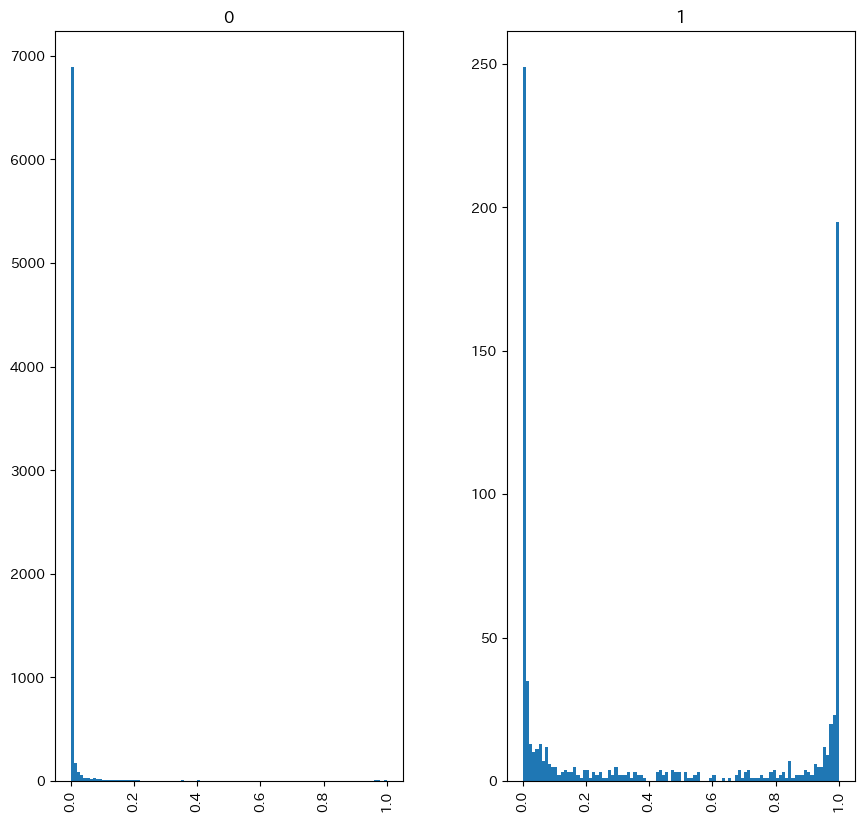

In [45]:
# y_test, y_pred を結合して、y_test 毎に、y_pred のhistogramを作成
y_test_pred=pd.DataFrame({"y_test":y_val,"y_pred":y_pred})
y_test_pred["y_pred"].hist(by=y_test_pred["y_test"],bins=100,figsize=(10,10))

In [46]:
# テストデータで予測・評価
y_pred = model.predict(X_test, num_iteration=model.best_iteration,predict_disable_shape_check=True)
y_pred_trans = (y_pred > 0.5).astype(int)

# 評価
accuracy = accuracy_score(y_test, y_pred_trans)
precision = precision_score(y_test, y_pred_trans)
recall = recall_score(y_test, y_pred_trans)
f1 = f1_score(y_test, y_pred_trans)
auc=roc_auc_score(y_test, y_pred)

# 小数点2桁まで表示
pd.set_option('display.float_format', '{:.2f}'.format)
print('Accuracy:', accuracy, "Precision:", precision, "Recall:", recall, "F1:", f1,"AUC:",auc)

Accuracy: 0.9786996417602492 Precision: 0.04925662572721396 Recall: 0.1877772301626417 F1: 0.0780417861532159 AUC: 0.7235013405120982


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

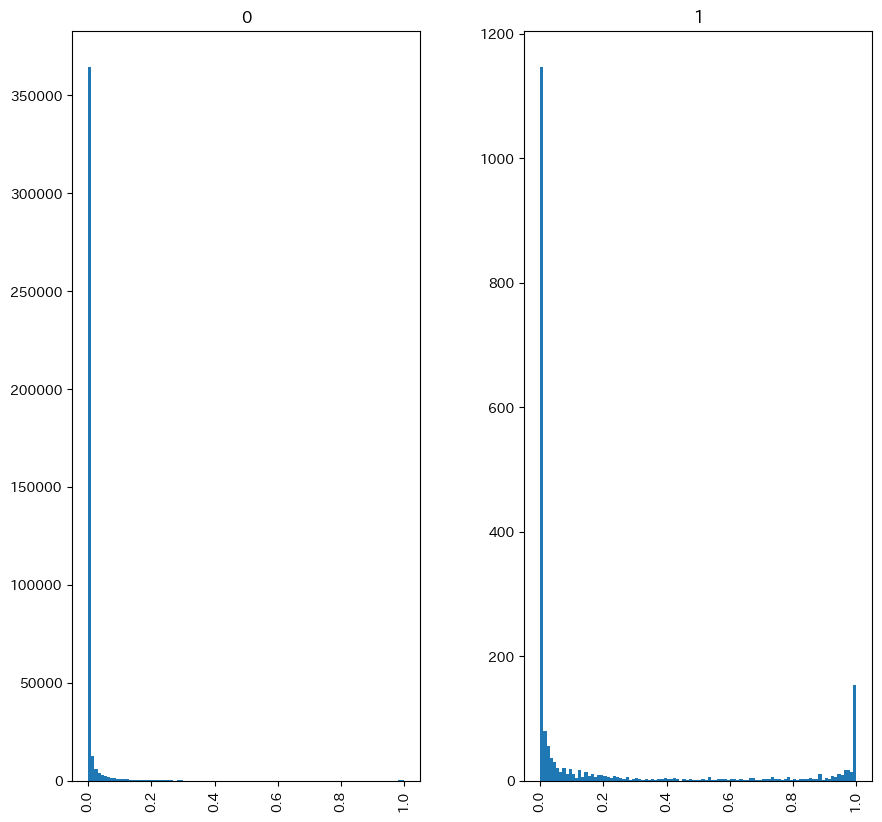

In [47]:
# y_test, y_pred を結合して、y_test 毎に、y_pred のhistogramを作成
y_test_pred=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
y_test_pred["y_pred"].hist(by=y_test_pred["y_test"],bins=100,figsize=(10,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, 'prefecture_name_香川県'),
  Text(0, 1, 'タイ料理_cat_dummy'),
  Text(0, 2, 'ダイニングバー_cat_dummy'),
  Text(0, 3, 'prefecture_name_北海道'),
  Text(0, 4, 'パスタ_cat_dummy'),
  Text(0, 5, '弁当_cat_dummy'),
  Text(0, 6, 'prefecture_name_高知県'),
  Text(0, 7, 'prefecture_name_秋田県'),
  Text(0, 8, 'ケーキ_cat_dummy'),
  Text(0, 9, 'レストラン_cat_dummy'),
  Text(0, 10, '韓国料理_cat_dummy'),
  Text(0, 11, 'バル_cat_dummy'),
  Text(0, 12, '惣菜・デリ_cat_dummy'),
  Text(0, 13, 'prefecture_name_宮城県'),
  Text(0, 14, 'からあげ_cat_dummy'),
  Text(0, 15, 'ワインバー_cat_dummy'),
  Text(

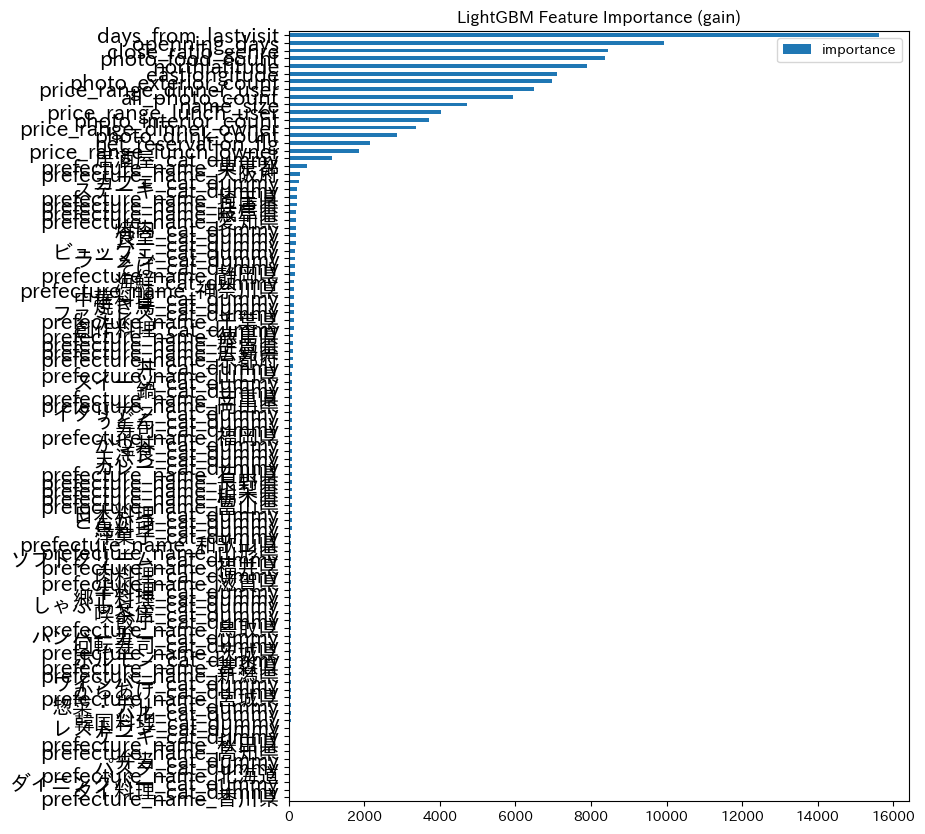

In [38]:
# feature importance
# 日本語を表示するためにフォントを指定

importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=X.columns, columns=['importance'])
importance.sort_values('importance',ascending=False).head(100).sort_values('importance').plot(kind='barh', figsize=(8, 10))
plt.title('LightGBM Feature Importance (gain)')
# indexのビン幅を調整
plt.yticks(fontsize=15)


In [39]:
importance.sort_values(by="importance",ascending=False).head(30)

,importance
days_from_lastvisit,15633.65
openning_days,9931.44
close_ratio_genre,8452.37
photo_food_count,8370.94
northlatitude,7890.97
eastlongitude,7091.57
photo_exterior_count,6979.25
price_range_dinner_user,6494.29
all_photo_count,5931.33
name_size,4708.47


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


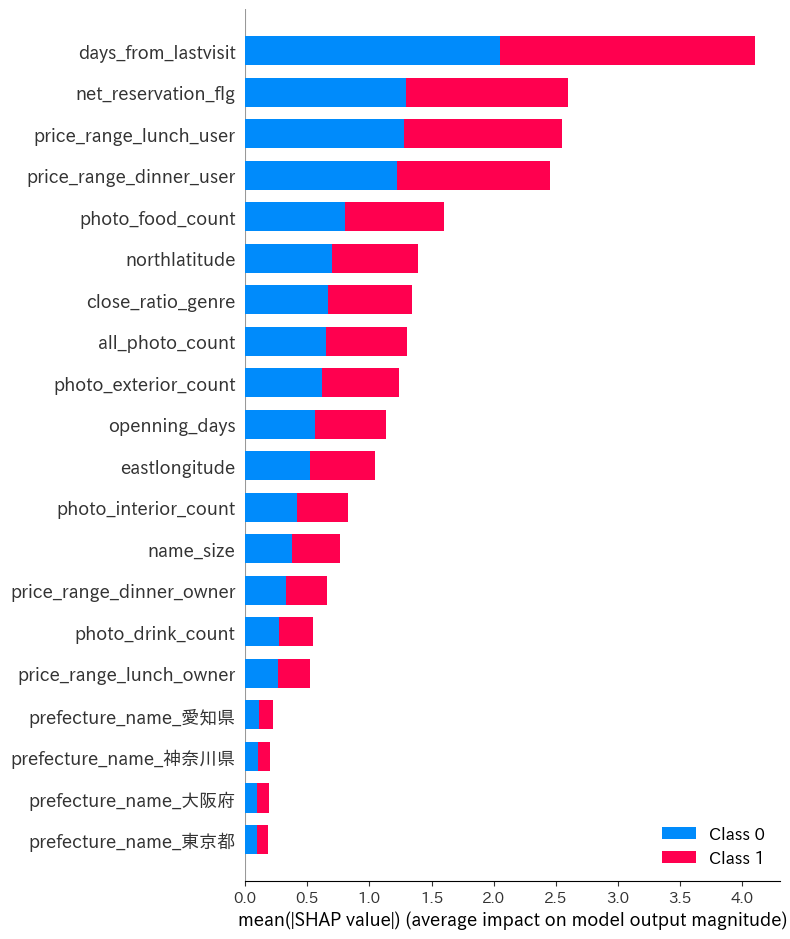

In [40]:
# shap分析
import shap
shap.initjs()

explainer = shap.TreeExplainer(model=model)

X_test_shap = X_test.head(1000).copy().reset_index(drop=True)
shap_values = explainer.shap_values(X=X_test_shap)
# shap_values をplot
# サンプルごとのshap_valuesをplot
shap.summary_plot(shap_values, X_test_shap,max_display=20)

In [41]:
%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')  # または別のバックエンドを選択してください

X_test=X_test.head(1)

explainer = shap.Explainer(model, X_test)
shap_values = explainer.shap_values(X_test)

for i in range(len(X_test)):
    shap.initjs()  # Jupyter Notebookでの可視化を初期化する
    shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i,:])  # 各インスタンスのSHAP値をプロットする
    plt.show()  # プロットを表示する

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [ ]:
explainer.expected_value

-12.570596654155368

In [ ]:
shap_values[i]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# 1. モデル shap.Explainer()に渡す
explainer = shap.Explainer(model)

X_test_shap = X_test.head(1000)

# 2. 説明変数(特徴量)を渡す
shap_values = explainer(X_test_shap)

In [ ]:
shap.plots.waterfall(shap_values[0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.